In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os


In [2]:
#Load data into using Pandas Read_csv
dataset_train = pd.read_csv("google-stock-price-data\Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#Lets understand how Dataframe.iloc is working
# Iloc representd for "Index Location of" 
# Try below commands removing comments
#dataset_train.iloc[:]                       # This will give you all dataframe values
#dataset_train.iloc[1]                        # this will return you your first index data#
#dataset_train.iloc[:,0]                    # return all data of om index column
#type(dataset_train.iloc[:,1])           # will return you all data of column 1 But output will be in Pandas.core.series.Series
#dataset_train.iloc[:,1:2]             # Prefered  # will return all data of column 1 But output will be in Pandas Dataframe

# Get your input data in variable (Open column data is our input data for our model)
trainset = dataset_train.iloc[:,1:2].values        # .values return array 
trainset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [33]:
# Now we will scale out trainset AKA input value within scale of 0 to 1 
# Min Max Scaler is precedure to Scale original value within maped value without loosing original information
# This is Normalization technique
#Normalization is used to scale the data between 0 and 1. It is defined as
#Yi = [Xi - min(X)]/[max(X) - min(X)]
#Where Xi is the i th data point and min represents the minimum and Maximum represents maximum. So Xi converts to Yi

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))        # Feature_range you can define for your output range (default (0,1))
training_set_scaled = sc.fit_transform(trainset)

In [8]:
training_set_scaled                                

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Create our training and testing dataset By taking first 60 days data to predict 61st days stock price
#### split data in x_train and y_train 

In [34]:
# now we will update our dataset in a way that our neural network will learn on basis of first two month data(60 days) to 
# predict next day price 
x_train = []
y_train = []
for i in range(60,1258):                             # tere are total 1258 data 
    x_train.append(training_set_scaled[i-60:i,0])     # append first 60 data to x_train dataset 
    y_train.append(training_set_scaled[i,0])         #for first 60 x_train data 61st day data will be our y_train data  
    
x_train = np.array(x_train)
y_train  = np.array(y_train)



In [35]:
x_train.shape           # our Training dataset

(1198, 60)

In [36]:
y_train.shape          # our y training data

(1198,)

In [37]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))      #reshape your dataset with adding one extra dimension


## RNN Model Creation using Keras

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

S:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
regressor = Sequential()            # initiate Keras Sequential model object

In [39]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))  #first layer input shape required 
regressor.add(Dropout(0.2))                               # setting dropout at each layer 
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))                             # output layer with one node for prediction
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [43]:
# Now our model is set now we need to our dataset
# fitting model with 100 epoch and batch size 32
# here we have given x_train and y_train , our model will first predict output from input dataset at each stage and again
# checked with y_label output then error will be calculated and furthaer weights assigned to nodes will be updated
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0411
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 14s 11ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015


### Model Prediction

In [45]:
# Load Test data 
dataset_test =pd.read_csv("google-stock-price-data\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values


In [46]:
# adding both test data and train data in a single dataframe for "Open" column
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [51]:
#create input set for modele evaluation 
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs.shape                      # there are totale 80 data

(80, 1)

In [52]:
inputs = sc.transform(inputs)     # Scale input values 
inputs.shape


(80, 1)

In [53]:
# create x_test dataset as we have done earlier with 60 days grouped data 

x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
x_test.shape


(20, 60)

In [54]:
#  Reshape input dataset
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [60]:
# Now predict stock price using predict method and passing x_test data
predicted_price = regressor.predict(x_test)
predicted_price

array([[0.9454845 ],
       [0.94067794],
       [0.9394189 ],
       [0.940994  ],
       [0.94649017],
       [0.9569246 ],
       [0.9684114 ],
       [0.9757852 ],
       [0.97868663],
       [0.97861135],
       [0.97718817],
       [0.97535604],
       [0.9737952 ],
       [0.97363776],
       [0.974841  ],
       [0.9817085 ],
       [0.99383515],
       [1.0086937 ],
       [1.0198512 ],
       [1.0180674 ]], dtype=float32)

In [61]:
predicted_price = sc.inverse_transform(predicted_price)   # get inverse_transformed value to map with original output
predicted_price

array([[787.37463],
       [784.79083],
       [784.114  ],
       [784.9607 ],
       [787.9152 ],
       [793.5244 ],
       [799.6992 ],
       [803.6631 ],
       [805.2228 ],
       [805.1823 ],
       [804.4173 ],
       [803.4324 ],
       [802.5933 ],
       [802.5087 ],
       [803.1555 ],
       [806.8472 ],
       [813.366  ],
       [821.35333],
       [827.3512 ],
       [826.3923 ]], dtype=float32)

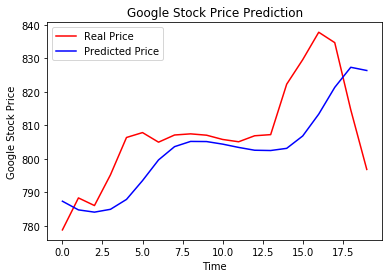

In [62]:
predicted_price = predicted_price
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## We can see our Model is able to Recognise Upwards and Downwards of Prices 
## Our Blue line is able to Track than when price will go Up and when it will come down